## Pandas Load Data as Dataframe

In [2]:
import pandas as pd

aislesDF = pd.read_csv('../aisles.csv')
departmentsDF = pd.read_csv('../departments.csv')
order_products_priorDF = pd.read_csv('../order_products__prior.csv')
order_products_trainDF = pd.read_csv('../order_products__train.csv')
ordersDF = pd.read_csv('../orders.csv')
productsDF = pd.read_csv('../products.csv')

## Frequency of Reorders in a Week

Explore the change of order numbers from Monday to Sunday.

In [3]:
import matplotlib.pyplot as plt

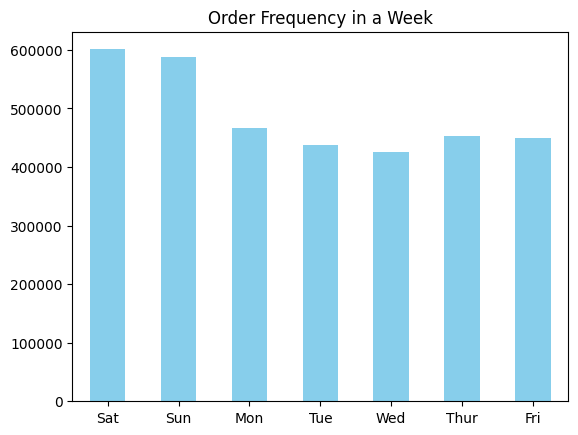

In [4]:
reorder_dow_freq = ordersDF['order_dow'].value_counts().sort_index()
reorder_dow_freq.index=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
fig = plt.figure()
reorder_dow_freq.plot(kind='bar', color="skyblue")
plt.xticks(rotation=0)
plt.title('Order Frequency in a Week')
plt.show()

## Frequency of Reorders in Hour of Day

Explore how order number changes in the hour of day.

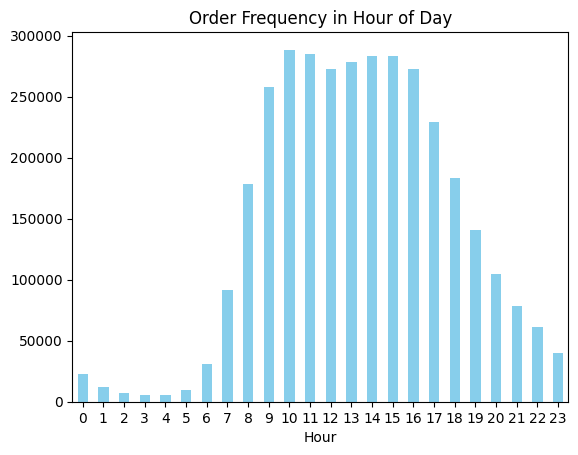

In [5]:
reorder_hour_of_day_freq = ordersDF['order_hour_of_day'].value_counts().sort_index()
#reorder_hour_of_day_freq.index = [str(i) for i in range(24)]
fig = plt.figure()
reorder_hour_of_day_freq.plot(kind='bar', color="skyblue")
plt.axvline(reorder_hour_of_day_freq.mean(), 
            linestyle='dashed', linewidth=2)
plt.xticks(rotation=0)
plt.title('Order Frequency in Hour of Day')
plt.xlabel('Hour')
plt.show()


## Frequency of Reorder Interval

In [6]:
order_interval_count = ordersDF.groupby('days_since_prior_order')['order_id'].agg('count')

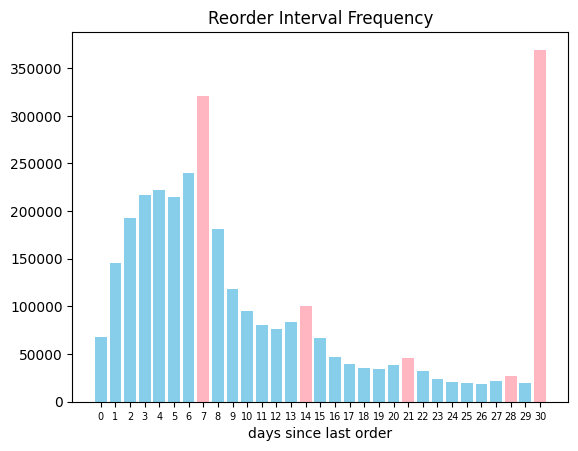

In [9]:
import numpy as np

fig = plt.figure()

color_list = ['skyblue'] * len(order_interval_count.index)
summit  = [7,14,21,28,30] 
for i in summit:
    color_list[i] = 'lightpink'
    
plt.bar(order_interval_count.index, order_interval_count, color=color_list)
plt.xticks(np.arange(len(order_interval_count.index)), rotation=0,fontsize=7)
plt.xlabel('days since last order')
plt.title('Reorder Interval Frequency')
plt.show()
fig.set_dpi(200)


##  Average Reorder Interval

How often do customers put a new order?

<Figure size 640x480 with 0 Axes>

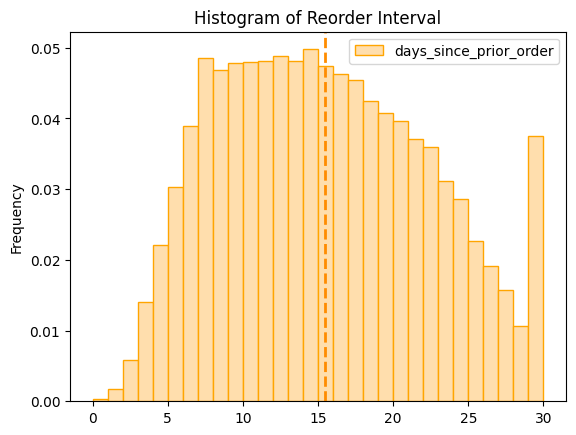

In [12]:

reorder_user_interval = ordersDF[['user_id', 'days_since_prior_order']].groupby('user_id').aggregate(np.nanmean)
fig = plt.figure()
reorder_user_interval.plot.hist(density=1, bins=30, facecolor='navajowhite', edgecolor="orange")
plt.axvline(reorder_user_interval['days_since_prior_order'].mean(), color='darkorange', linestyle='dashed', linewidth=2)
plt.title('Histogram of Reorder Interval')
plt.show()



## Popular Items in Shopping Cart History

In this part, let's see what are the most popular items on customers' order lists.

First take a look at each dataset, and then merge them into one dataframe with all the following included:
* user_id
* order_id
* product_id
* product_name

In [14]:
# All orders (prior & train): order_id, product_id
All_Order_Product=pd.concat([order_products_priorDF, order_products_trainDF])

In [16]:
# orders in prior/train merged with product names
Order_Product_Name_Prior = pd.merge(order_products_priorDF, 
                                    productsDF, how='left', on='product_id')
Order_Product_Name_Train = pd.merge(order_products_trainDF, 
                                    productsDF, how='left', on='product_id')


In [17]:
# Prior orders with user_id, product_id, product_name
Prior_User_Order_Product = pd.merge(Order_Product_Name_Prior, 
                                    ordersDF, how='left', on='order_id')

In [18]:
# Now we have all we need: order_id, product_id, user_id, product_name
Prior_User_Order_Product.head() 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


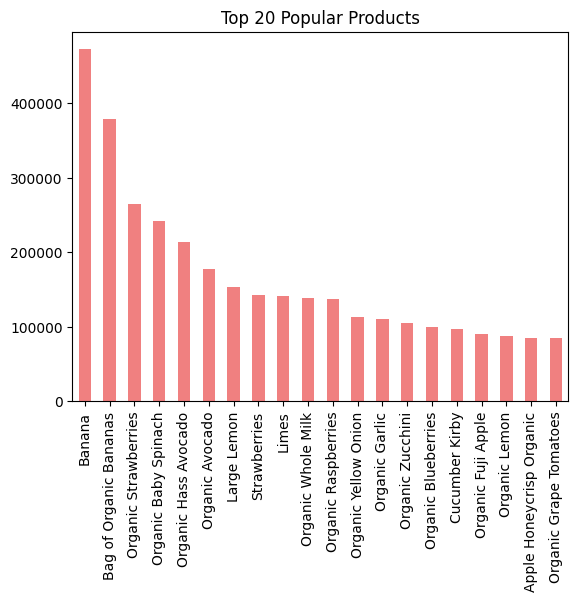

In [19]:
# top 20 most popular products
Products_Count = Prior_User_Order_Product['product_name'].value_counts()
fig = plt.figure()
Products_Count[0:20].plot(kind="bar", color='lightcoral')
plt.xticks(rotation=90)
plt.title('Top 20 Popular Products')
plt.show()


In [20]:
products_tuple_list = [tuple(x) for x in Products_Count.reset_index().values]

In [21]:
dic = {}
for pair in products_tuple_list:
    key = pair[0]
#     print(type(key))
    value = pair[1]
#     print(type(value))
    if key in dic:
        reservedValue = dic[key]
        reservedValue += value 
    else:
        dic[key] = value

## Treeplot: Products Sales in Each Department

In [25]:
product_count = Prior_User_Order_Product.groupby(['department_id','aisle_id'])['product_id'].agg('count')

In [26]:
product_count_DF = pd.DataFrame(product_count)
product_count_DF.reset_index(inplace=True)
product_count_DF.rename(columns = {'product_id':'product_count'}, inplace=True)
product_count_DF = product_count_DF.merge(departmentsDF, how='left', on='department_id').\
                                    merge(aislesDF,how='left', on='aisle_id')

In [27]:
product_count_DF.head()

,department_id,aisle_id,product_count,department,aisle
0,1,34,71742,frozen,frozen meat seafood
1,1,37,498425,frozen,ice cream ice
2,1,38,390299,frozen,frozen meals
3,1,42,99369,frozen,frozen vegan vegetarian
4,1,52,232763,frozen,frozen breakfast


In [28]:
product_info = Prior_User_Order_Product.merge(departmentsDF,how='left', on='department_id') \
                                       .merge(aislesDF,how='left', on='aisle_id')

In [29]:
product_info.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,pantry,baking ingredients


In [31]:
result = product_info.groupby(['order_hour_of_day', 'product_id']).size().reset_index(name='count')


In [32]:
result

,order_hour_of_day,product_id,count
0,0,1,12
1,0,2,1
2,0,3,2
3,0,4,4
4,0,7,1
...,...,...,...
767863,23,49682,1
767864,23,49683,1228
767865,23,49685,1
767866,23,49686,5
